<a href="https://colab.research.google.com/github/nishu-qatech/LendingClubCaseStudy/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

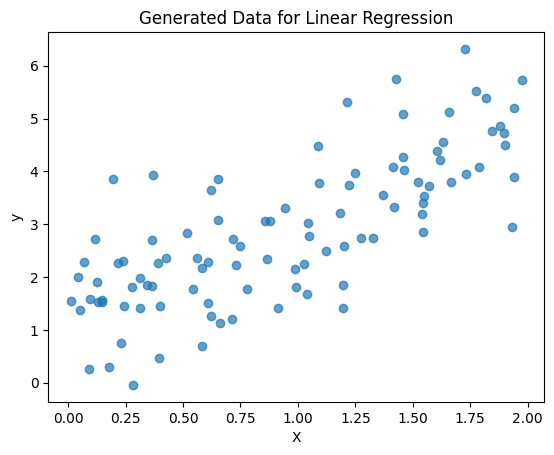

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for a linear relationship: y = 2x + 1 + noise
X = 2 * np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Plot the data
plt.scatter(X, y, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()


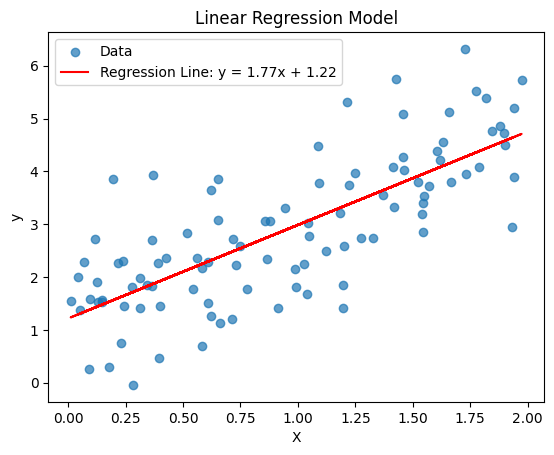

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the slope (coefficients) and intercept
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Plot the data and the regression line
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, model.predict(X), color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


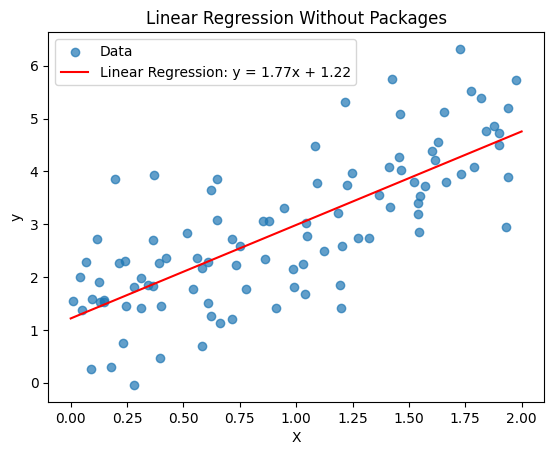

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for a linear relationship: y = 2x + 1 + noise
X = 2 * np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Implement simple linear regression without using packages
def linear_regression(X, y):
    # Add a bias term to X (column of ones)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate the coefficients using the normal equation
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    return w

# Fit the linear regression model
w = linear_regression(X, y)

# Make predictions on the original data
X_pred = np.linspace(0, 2, 100).reshape(-1, 1)
X_pred_b = np.c_[np.ones((100, 1)), X_pred]
y_pred = X_pred_b.dot(w)

# Plot the results
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X_pred, y_pred, color='red', label=f'Linear Regression: y = {w[1][0]:.2f}x + {w[0][0]:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Without Packages')
plt.legend()
plt.show()


[link text](https://)* **`bold text`**Gradient* Descent)

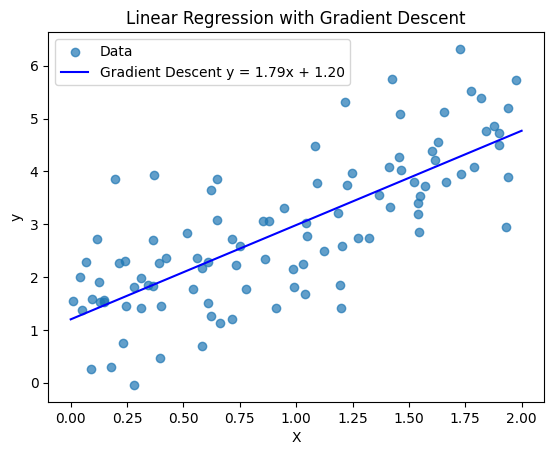

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for a linear relationship: y = 2x + 1 + noise
X = 2 * np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Implement linear regression using gradient descent
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    w =  np.random.randn(2, 1) #np.zeros((2,1))#np.ones((2,1))

    for iteration in range(n_iterations):
        gradients = -1*2/m * X_b.T.dot(y-X_b.dot(w))
        direction = -1*gradients
        w = w + learning_rate * direction

    return w

# # Implement linear regression using stochastic gradient descent
# def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
#     m = len(X)
#     X_b = np.c_[np.ones((m, 1)), X]
#     w = np.random.randn(2, 1) #np.ones((2,1)) #np.random.randn(2, 1)

#     for iteration in range(n_iterations):
#         for i in range(m):
#             random_index = np.random.randint(m)
#             xi = X_b[random_index:random_index+1]
#             yi = y[random_index:random_index+1]
#             # print(xi,yi,theta,xi.dot(theta) - yi)
#             gradients = 2 *(xi.dot(w) - yi)*xi.T
#             # print(gradients)
#             # break
#             w = w - learning_rate * gradients

#     return w

# Fit the linear regression models using batch gradient descent and stochastic gradient descent
theta_batch = gradient_descent(X, y)
# theta_stochastic = stochastic_gradient_descent(X, y)
# print(theta_stochastic)

# Make predictions on the original data
X_pred = np.linspace(0, 2, 100).reshape(-1, 1)
X_pred_b = np.c_[np.ones((100, 1)), X_pred]
y_pred_batch = X_pred_b.dot(theta_batch)
# y_pred_stochastic = X_pred_b.dot(theta_stochastic)

# Plot the results
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X_pred, y_pred_batch, color='blue', label=f'Gradient Descent y = {theta_batch[1][0]:.2f}x + {theta_batch[0][0]:.2f}')
# plt.plot(X_pred, y_pred_stochastic, color='red', label=f'Stochastic Gradient Descent y = {theta_stochastic[1][0]:.2f}x + {theta_stochastic[0][0]:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()


In [ ]:
theta_batch

array([[1.22381395],
       [1.76241605]])

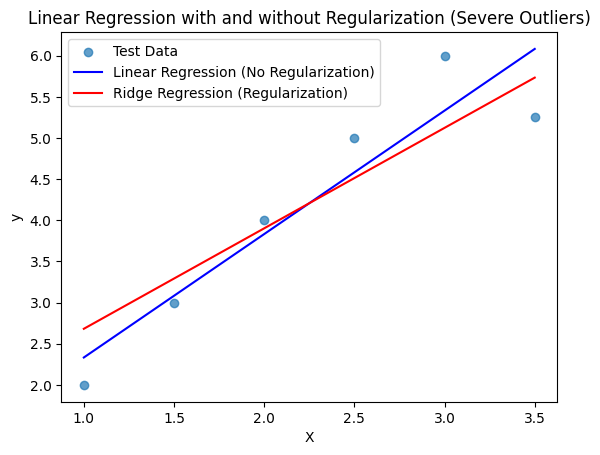

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data for a linear relationship: y = 2x + 1 + noise
X = np.array([[1],[1.5],[2],[2.5],[3],[3.5]])
y = 2 * X

# Introduce severe outliers
y[-1:] = 1.5* X[-1:]

# Split the data into training and testing sets

# Create a linear regression model
model_linear = Ridge(alpha=0)  # No regularization

# Fit the model to the training data
model_linear.fit(X, y)

# Make predictions on the testing data
predictions_linear = model_linear.predict(X)

slope_1 = model_linear.coef_[0][0]

# Create a Ridge Regression model with regularization (alpha=1)
model_ridge = Ridge(alpha=1)

# Fit the model to the training data
model_ridge.fit(X, y)

# Make predictions on the testing data
predictions_ridge = model_ridge.predict(X)

slope_2 = model_ridge.coef_[0][0]


# Plot the results
plt.scatter(X, y, alpha=0.7, label='Test Data')
plt.plot(X, predictions_linear, color='blue', label='Linear Regression (No Regularization)')
plt.plot(X, predictions_ridge, color='red', label='Ridge Regression (Regularization)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with and without Regularization (Severe Outliers)')
plt.legend()
plt.show()

# print("Without Regularization",slope_1, model.intercept_[0])
# print("With Regularization",slope_2, model_ridge.intercept_[0])
# # Evaluate performance using Mean Squared Error
# mse_linear = mean_squared_error(y, predictions_linear)
# mse_ridge = mean_squared_error(y, predictions_ridge)

# print(f'Mean Squared Error (Linear Regression): {mse_linear:.2f}')
# print(f'Mean Squared Error (Ridge Regression): {mse_ridge:.2f}')
